## Análise dos dados de vacinação contra covid no estado do Rio de Janeiro



fonte dos dados: https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
dados = pd.read_csv('Dados_RJ.csv', sep=';')

Aqui podemos observar uma colona chamada 'paciente_id' , ou seja, provavelmente um 'RG' da pessoa vacina, então utilizaremos ela como base para algumas tarefas

In [4]:
dados.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,c91e4e01-8b3f-4903-b80a-4add8ab088c0-i0b0,f4a89794ce5b227957318a949b055917dd974784755fae...,55.0,1965-11-27,M,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,...,ABX0529,MINISTERIO DA SAUDE,Organization/00394544000851,2021-05-25,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-05-25T15:22:55.000Z,NaN
1,2d7525ae-0a8c-4a41-9a0e-180157cef2f0-i0b0,80ebd3b103d3f821309be66ac37971b76b3c4d55b76885...,48.0,1972-07-11,M,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,...,214VCD044W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-26,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-03T12:52:27.000Z,NaN
2,6c24180f-e6f8-4071-86b5-84507348e5e0-i0b0,7c52ca70a5e77723abf32666cfd19e8f82aa4d274b6c6a...,45.0,1975-08-28,M,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,...,214VCD058W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-17,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-25T16:57:23.000Z,NaN
3,5f702b7e-d265-4605-b944-04451fd51af3-i0b0,92df9f991c8903e9e16fc8a98312ea739533dd43f893a4...,51.0,1969-05-06,F,1.0,BRANCA,330455.0,10.0,RIO DE JANEIRO,...,210129,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-06,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-06T18:05:49.000Z,NaN
4,6da4da5a-cdd4-4082-b10f-0d30110151a4-i0b0,536eb95b23b57cad386b50df0760d09ba932110b44ab59...,59.0,1961-12-12,M,4.0,AMARELA,330455.0,10.0,RIO DE JANEIRO,...,213VCD025W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-27,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-25T16:55:30.000Z,NaN


Aqui vemos que os nomes dados as doses da vacina estão um tanto feios, então em seguida irei renomea-los para poder trabalhar de uma forma mais simples. Além disso é possível observar uma dose além da primeira e segunda, aqui já nos deparamos com o primeiro erro de preenchimento dos dados, e como no momento não dá pra saber se é primeira ou segunda dose irei renomea-la para 'dose_indefinida'

In [5]:
dados['vacina_descricao_dose'].unique()

array(['\xa0\xa0\xa0\xa01ª\xa0Dose', '\xa0\xa0\xa0\xa02ª\xa0Dose',
       '\xa0\xa0\xa0\xa0Dose\xa0'], dtype=object)

In [6]:
def renomeador(data):
    """Altera a nomeclatura antes dada as doses de vacinação para uma mais fácil de trabalhar"""
    if data == '\xa0\xa0\xa0\xa01ª\xa0Dose':
        return 'primeira_dose'
    elif data == '\xa0\xa0\xa0\xa02ª\xa0Dose':
        return 'segunda_dose'
    else:
        return 'dose_indefinida'

In [7]:
dados['vacina_descricao_dose'] = dados['vacina_descricao_dose'].apply(renomeador)

Até aqui está tudo bem, temos uma grande predominância da primeira dose com relação a segunda, o que já era de se esperar, e também o número de doses indefinidas é insignificante próximo das outras

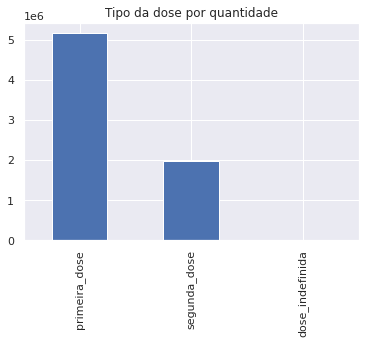

In [8]:
dados['vacina_descricao_dose'].value_counts().plot(kind='bar')
plt.title('Tipo da dose por quantidade');

Ao invés de tratar os dados como um só resolvi dividir em dois, um apenas sobre a primeira dose da vacina, e outro apenas sobre a segunda dose

In [9]:
prim_dose = dados[dados['vacina_descricao_dose'] == 'primeira_dose'].copy()

In [10]:
seg_dose = dados[dados['vacina_descricao_dose'] == 'segunda_dose'].copy()

In [11]:
dados['paciente_id'].isnull().value_counts()

False    7143043
True           1
Name: paciente_id, dtype: int64

Como há apenas um dado faltante no quesito 'paciente_id' resolvi utilizar essa coluna, que creio ter valor único para cada pessoa, para remover duplicatas. Vemos logo em seguida que deu certo

In [12]:
prim_dose['paciente_id'].duplicated().value_counts()

False    5100985
True       66980
Name: paciente_id, dtype: int64

In [13]:
seg_dose['paciente_id'].duplicated().value_counts()

False    1955218
True       19849
Name: paciente_id, dtype: int64

In [14]:
prim_dose.drop_duplicates(subset='paciente_id', inplace=True)
seg_dose.drop_duplicates(subset='paciente_id', inplace=True);

Após essa pequena limpeza começo a explorar os dados, porcentagem de vacinados por município, sexo, raça/cor e etc.
De cara vemos que o Rio de Janeiro concentra quase metade das vacinações, algo que não é tão absurto visto que esse município concentra mais de 1/3 da população de todo estado, além de ser o principal ponto turístico e etc...

In [15]:
prim_dose['paciente_endereco_nmmunicipio'].value_counts(normalize=True)*100

RIO DE JANEIRO           48.864483
SAO GONCALO               4.045562
DUQUE DE CAXIAS           3.901682
NITEROI                   3.203671
NOVA IGUACU               3.191902
                           ...    
CALCADO                   0.000020
XAPURI                    0.000020
APARECIDA DO RIO DOCE     0.000020
ARATUIPE                  0.000020
DIVINOLANDIA              0.000020
Name: paciente_endereco_nmmunicipio, Length: 4019, dtype: float64

In [16]:
seg_dose['paciente_endereco_nmmunicipio'].value_counts(normalize=True)*100

RIO DE JANEIRO          47.919089
SAO GONCALO              4.801880
DUQUE DE CAXIAS          3.968818
NOVA IGUACU              3.755482
NITEROI                  3.412090
                          ...    
PORTO DOS GAUCHOS        0.000051
MAUES                    0.000051
PALMEIRAS DE GOIAS       0.000051
CHARQUEADA               0.000051
SANTA BARBARA DO SUL     0.000051
Name: paciente_endereco_nmmunicipio, Length: 2978, dtype: float64

Aqui nos deparamos com o primeiro erro gritante na coleta de dados, a raça/cor 'Sem Informação' que representa quase 40% dos vacinados com a primeira dose, e se repete com 40% dos vacinados na 2° dose

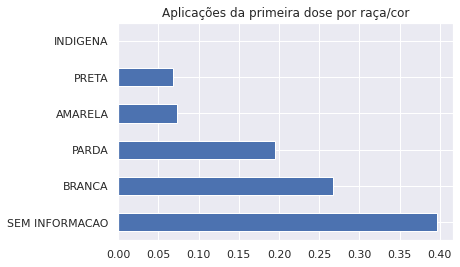

In [17]:
prim_dose['paciente_racacor_valor'].value_counts(normalize=True).plot(kind='barh')
plt.title('Aplicações da primeira dose por raça/cor');

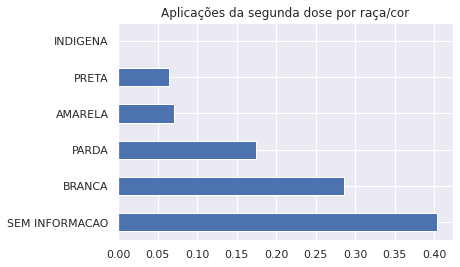

In [18]:
seg_dose['paciente_racacor_valor'].value_counts(normalize=True).plot(kind='barh')
plt.title('Aplicações da segunda dose por raça/cor');

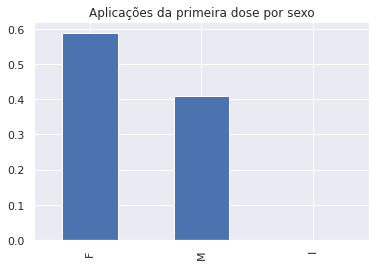

In [19]:
prim_dose['paciente_enumsexobiologico'].value_counts(normalize=True).plot(kind='bar')
plt.title('Aplicações da primeira dose por sexo');

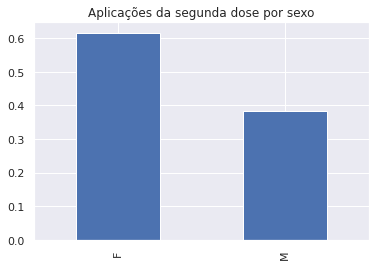

In [20]:
seg_dose['paciente_enumsexobiologico'].value_counts(normalize=True).plot(kind='bar')
plt.title('Aplicações da segunda dose por sexo');

Um outro erro presente é a vacinação de pessoas menores de 18 anos, tanto com a primeira quanto com a segunda dose, sendo que, no momento dessa análise, menores de 18 ainda não podem tomar a vacina devido a falta de testes sobre a eficácia nesse grupo

In [21]:
prim_dose[prim_dose['paciente_idade'] < 18]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
12695,69bfda15-e20c-404b-a8a4-2eda1df86e50-i0b0,3afdc8d01fcee929cf95b194c42e8d7500c8c019b09df8...,17.0,2003-04-14,F,1.0,BRANCA,330510.0,10.0,SAO JOAO DE MERITI,...,210070,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-08,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-08T17:15:43.000Z,NaN
17579,d0e0d8ea-e508-4caa-a4b2-bfcc774a3ec3-i0b0,473e19a163c3fa311d5003e6df8fd94a95081519ce79ba...,17.0,2003-08-19,F,99.0,SEM INFORMACAO,330285.0,10.0,MESQUITA,...,210054,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-25,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-29T18:29:05.000Z,NaN
22121,998f485b-1d36-4486-a0a8-8c55f85f6401-i0b0,f0ad61e51f98ec5dd8ce30a1e89ec41ca69609867d5439...,17.0,2003-07-04,F,3.0,PARDA,330510.0,10.0,SAO JOAO DE MERITI,...,210063,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-07,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-10T11:53:21.000Z,NaN
25316,52d30cac-7b2e-4de4-a188-13a52fd2ea22-i0b0,eea2f4b3643b1bbafaef1c86ab976f7a791b3bfccd5f0d...,14.0,2007-01-10,M,3.0,PARDA,330170.0,10.0,DUQUE DE CAXIAS,...,214VCD083W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-11,primeira_dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-06-04T17:39:55.000Z,NaN
80266,80f43b64-0fb0-4b48-8f36-da1ed21d7641-i0b0,6d3beb28f8b9cb78943dc9a07ff2da358e221fa28d9f72...,8.0,2012-07-05,F,99.0,SEM INFORMACAO,330330.0,10.0,NITEROI,...,215VCD118Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-06-17,primeira_dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-06-17T11:37:59.000Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971472,1aa80c9e-ad08-4c27-8db2-1c12da5e478e-i0b0,6d275a64f8aa181818496915fd3a24386652664944adb3...,11.0,2009-09-22,M,99.0,SEM INFORMACAO,430310.0,10.0,CACHOEIRINHA,...,4120Z026,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-03-01,primeira_dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-03-01T14:24:29.000Z,NaN
7059907,d52966d4-ffa1-48ff-84f8-f99e60ca63a6-i0b0,5e5b933545dc6a562c1385bb543d7facfde2c2bf5594c7...,17.0,2004-03-12,F,99.0,SEM INFORMACAO,330227.0,10.0,JAPERI,...,210145,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-30,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-06-07T20:28:25.000Z,NaN
7064457,d5b51a37-af4f-4249-a19a-83a7dfe4add3-i0b0,9d8674e5989f0d46926fddc5cddaec49fae0e9da99ed5d...,16.0,2005-02-26,M,99.0,SEM INFORMACAO,351050.0,10.0,CARAGUATATUBA,...,ABX0529,MINISTERIO DA SAUDE,Organization/00394544000851,2021-05-24,primeira_dose,89,Covid-19-AstraZeneca,Novo PNI,2021-06-08T12:52:21.000Z,NaN
7097304,000c7842-896b-41cc-91a1-ad2388755cfc-i0b0,825c6c8d082da52da9fa324b13e6d2f264d6fee40acb8f...,17.0,2003-11-11,F,99.0,SEM INFORMACAO,330045.0,10.0,BELFORD ROXO,...,EW0199,MINISTERIO DA SAUDE,Organization/00394544000851,2021-05-25,primeira_dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-06-23T14:41:40.000Z,NaN


In [22]:
seg_dose[seg_dose['paciente_idade'] < 18]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
257484,669dd1fb-eb26-498d-a473-6cafc3941837-i0b0,473e19a163c3fa311d5003e6df8fd94a95081519ce79ba...,17.0,2003-08-19,F,99.0,SEM INFORMACAO,330285.0,10.0,MESQUITA,...,210054,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-15,segunda_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-29T18:30:34.000Z,NaN
277064,b578428f-3119-4ab3-bb60-cdae4336633b-i0b0,df2009ab8a9f429a9d25571ff47576f31843e16ee74e33...,17.0,2003-02-24,F,1.0,BRANCA,330455.0,10.0,RIO DE JANEIRO,...,202010019,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-17,segunda_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-28T14:10:25.000Z,NaN
397353,c4e9a795-2810-48c6-8ce7-48e427f13e41-i0b0,5b89b35e0a86a08a8c61add366e460d7d0e22088207ffd...,17.0,2003-04-21,M,99.0,SEM INFORMACAO,330015.0,10.0,APERIBE,...,210054,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-30,segunda_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-05-06T13:10:45.000Z,NaN
399299,3aca5edc-1ee8-4371-bc49-dac0414e3700-i0b0,5bd91f1a3d2eb1268d5d4edaea93520b3e4d233b1c5100...,17.0,2003-07-24,M,99.0,SEM INFORMACAO,330390.0,10.0,PETROPOLIS,...,213VCD017W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-19,segunda_dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-06T19:32:00.000Z,NaN
602234,70e0667a-c068-4e9b-8c91-1156d8207815-i0b0,9c77e019d541c3dc5e8cc4cdd0f77f998ff3bfec4325b2...,12.0,2008-06-05,F,99.0,SEM INFORMACAO,330440.0,10.0,RIO CLARO,...,210011A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-08,segunda_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-08T20:27:11.000Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6905461,d5908f91-7d80-443c-881b-f7cc09dc83e0-i0b0,b49e1534f582eef43f8421bae8dea5affae3ab63daeb7a...,17.0,2004-02-12,M,99.0,SEM INFORMACAO,330100.0,10.0,CAMPOS DOS GOYTACAZES,...,210145,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-19,segunda_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-06-02T15:26:38.000Z,NaN
6911561,0b0cedcf-ff9a-422d-8e58-30904559d6f1-i0b0,5816141bf90ce590f9f621c44ec576462fc6dc5cec72a5...,17.0,2003-08-30,F,99.0,SEM INFORMACAO,330100.0,10.0,CAMPOS DOS GOYTACAZES,...,210139,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-15,segunda_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-06-02T19:33:38.000Z,NaN
6912061,87d14903-d8fc-4cf0-855c-f8c844bb27b3-i0b0,ece812c329ccd7f9cea2bb9beb85fee4e3ddd90e1ca6ce...,17.0,2003-06-28,M,4.0,AMARELA,330452.0,10.0,RIO DAS OSTRAS,...,210139,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-15,segunda_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-06-02T21:24:14.000Z,NaN
6989971,7c69b912-7583-4ecc-94d3-d578ebb976b0-i0b0,0682d297092b4fe7053dd98e15db66a5b079d632059d8b...,17.0,2003-07-20,F,99.0,SEM INFORMACAO,330370.0,10.0,PARAIBA DO SUL,...,202010019,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-12,segunda_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-18T17:05:35.000Z,NaN


Além disso temos aqui um exemplo de alguem menor de 18 vacinado da 2° dose que não consta na 1°

In [23]:
prim_dose[prim_dose['paciente_datanascimento'] =='2008-06-05']

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem


Por final decidi averiguar se há registro de pessoas vacinadas antes do inicio da vacinação no estado :18/01/2021, e o resultado foi um número muito baixo

In [24]:
prim_dose[prim_dose['vacina_dataaplicacao'] < '2021-01-18']

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
162244,01e4c50c-fe7b-4383-afec-3d16d174eb35-i0b0,95be261de1a249fe3397f1f0d8b4e3d44e913bb06e15a0...,21.0,1999-06-17,F,99.0,SEM INFORMACAO,330490.0,10.0,SAO GONCALO,...,202009015,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-17,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-29T14:00:32.000Z,NaN
217858,2b0f5219-0504-44a0-a98d-09c47a9c28c0-i0b0,5ca8c7d63334c9fe8c0d7ad472cc0003c4239f7c2eb9a7...,28.0,1992-02-14,F,3.0,PARDA,330455.0,10.0,RIO DE JANEIRO,...,4120Z026,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-01-17,primeira_dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-03-12T12:33:21.000Z,NaN
485579,43665864-15a7-4930-a203-3c091d1d92a1-i0b0,c4d6d2136e79acdcf21f518ebf33e28ad0aa41396df725...,51.0,1969-04-10,F,1.0,BRANCA,330455.0,10.0,RIO DE JANEIRO,...,214VCD058W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-01-17,primeira_dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-06-02T15:54:11.000Z,NaN
874548,70fdf11d-4f08-4664-95bc-6f80ca343e0b-i0b0,791296ffc055a7488c413a073172dc939f2d103639270a...,50.0,1970-12-14,F,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,...,202010019,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-17,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-22T18:56:11.000Z,NaN
1465310,28879552-074b-4683-b4d2-5a5f4783d5ec-i0b0,dcf7f5d8f45448ea067f8161fa9c1edcf864b6bc599e06...,41.0,1979-01-30,F,99.0,SEM INFORMACAO,330490.0,10.0,SAO GONCALO,...,202009015,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-17,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-29T14:00:10.000Z,NaN
1594237,a90a1d99-07e0-4f17-a07d-8404fe6848f0-i0b0,239d30342662f3e925e3717f2f5d992a2711665d038080...,68.0,1952-05-26,M,2.0,PRETA,330475.0,10.0,SAO FRANCISCO DE ITABAPOANA,...,210097,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-17,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-19T18:46:30.000Z,NaN
2300103,58b4f942-81ee-4b88-994c-9bde5fad30c6-i0b0,bc5d062ca6a8362ab840a65f0dc88b19f75ba3c0b8ffe7...,58.0,1962-11-01,F,1.0,BRANCA,330490.0,10.0,SAO GONCALO,...,202009015,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-17,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-29T13:59:22.000Z,NaN
2433347,306a46b7-e151-442a-ae6d-95769eb5efeb-i0b0,d8d36e2bc2a1ba8dad2d41282c4b08c83db6910deb7ac0...,45.0,1975-07-04,F,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,...,202010019,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-17,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-22T01:56:40.000Z,NaN
2652564,b896361b-99d0-497c-8f87-6c31a9ef637c-i0b0,e5e2680f2a26fee7e2d9bcd3463e878edac82cefc314d8...,70.0,1950-03-25,M,3.0,PARDA,330250.0,10.0,MAGE,...,202009013,SERUM INSTITUTE OF INDIA LTD,NaN,2021-01-04,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-02-22T14:08:57.000Z,NaN
4303734,5ed66464-f8e2-4f0b-ac9a-2aee74fb1f2a-i0b0,32e3f77987754020c92327c758ddb022fcc7faa8a66302...,22.0,1998-09-18,F,3.0,PARDA,330490.0,10.0,SAO GONCALO,...,202009015,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-17,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-29T13:56:41.000Z,NaN


In [25]:
prim_dose[prim_dose['vacina_dataaplicacao'] < '2021-01-18']['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde       12
Faixa Etária                  2
Comorbidades                  1
Trabalhadores da Educação     1
Name: vacina_categoria_nome, dtype: int64

In [26]:
prim_dose[prim_dose['vacina_dataaplicacao'] < '2021-01-18']['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan    17
Vacina Covid-19 - Covishield            3
Name: vacina_nome, dtype: int64

Para finalizar e garantir que a teoria do 'paciente_id' ser um identificador único de cada paciente junto agora ambos e procuramos novamente por 'duplicatas' nessa coluna, e obrigatóriamente devemos encontrar um número próximo ao total de vacinados na segunda dose, pois para alguém receber a segunda dose tem que ter recebido a primeira

In [27]:
concat = pd.concat([prim_dose,seg_dose])

In [28]:
concat.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,c91e4e01-8b3f-4903-b80a-4add8ab088c0-i0b0,f4a89794ce5b227957318a949b055917dd974784755fae...,55.0,1965-11-27,M,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,...,ABX0529,MINISTERIO DA SAUDE,Organization/00394544000851,2021-05-25,primeira_dose,89,Covid-19-AstraZeneca,Novo PNI,2021-05-25T15:22:55.000Z,NaN
1,2d7525ae-0a8c-4a41-9a0e-180157cef2f0-i0b0,80ebd3b103d3f821309be66ac37971b76b3c4d55b76885...,48.0,1972-07-11,M,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,...,214VCD044W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-26,primeira_dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-03T12:52:27.000Z,NaN
2,6c24180f-e6f8-4071-86b5-84507348e5e0-i0b0,7c52ca70a5e77723abf32666cfd19e8f82aa4d274b6c6a...,45.0,1975-08-28,M,99.0,SEM INFORMACAO,330455.0,10.0,RIO DE JANEIRO,...,214VCD058W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-17,primeira_dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-25T16:57:23.000Z,NaN
3,5f702b7e-d265-4605-b944-04451fd51af3-i0b0,92df9f991c8903e9e16fc8a98312ea739533dd43f893a4...,51.0,1969-05-06,F,1.0,BRANCA,330455.0,10.0,RIO DE JANEIRO,...,210129,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-06,primeira_dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-06T18:05:49.000Z,NaN
4,6da4da5a-cdd4-4082-b10f-0d30110151a4-i0b0,536eb95b23b57cad386b50df0760d09ba932110b44ab59...,59.0,1961-12-12,M,4.0,AMARELA,330455.0,10.0,RIO DE JANEIRO,...,213VCD025W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-27,primeira_dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-25T16:55:30.000Z,NaN


In [29]:
concat['paciente_id'].duplicated().value_counts()

False    5241734
True     1814469
Name: paciente_id, dtype: int64

E sim, encontramos um valor muito próximo, não foi exatamente igual, mas provavelmente essa diferença se dá por erro de preenchimento nos dados, como por exemplo ter preenchido a primeira dose de alguem como segunda, entre outras possibilidades.

In [32]:
prim_dose['vacina_dataaplicacao'] = pd.to_datetime(prim_dose['vacina_dataaplicacao'], format='%Y-%m-%d')
seg_dose['vacina_dataaplicacao'] = pd.to_datetime(seg_dose['vacina_dataaplicacao'], format='%Y-%m-%d')

In [33]:
prim_dose['vacina_dataaplicacao']

0         2021-05-25
1         2021-04-26
2         2021-05-17
3         2021-04-06
4         2021-04-27
             ...    
7143039   2021-04-19
7143040   2021-03-29
7143041   2021-04-10
7143042   2021-04-13
7143043   2021-03-29
Name: vacina_dataaplicacao, Length: 5100985, dtype: datetime64[ns]

In [34]:
prim_dose['mes_da_vacinacao']=pd.DatetimeIndex(prim_dose['vacina_dataaplicacao']).month
seg_dose['mes_da_vacinacao']=pd.DatetimeIndex(seg_dose['vacina_dataaplicacao']).month

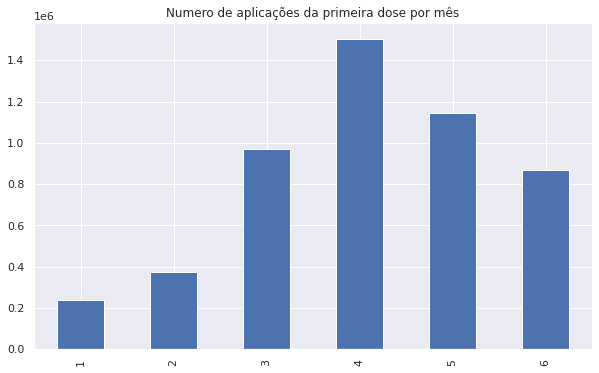

In [35]:
plt.figure(figsize=(10,6))
prim_dose['mes_da_vacinacao'].value_counts(sort=False).plot(kind='bar')
plt.title('Numero de aplicações da primeira dose por mês');

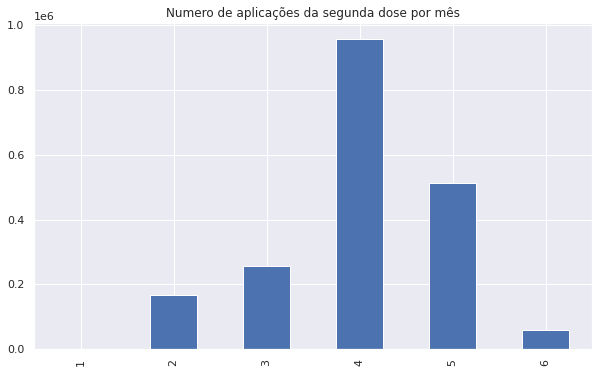

In [37]:
plt.figure(figsize=(10,6))
seg_dose['mes_da_vacinacao'].value_counts(sort=False).plot(kind='bar')
plt.title('Numero de aplicações da segunda dose por mês');

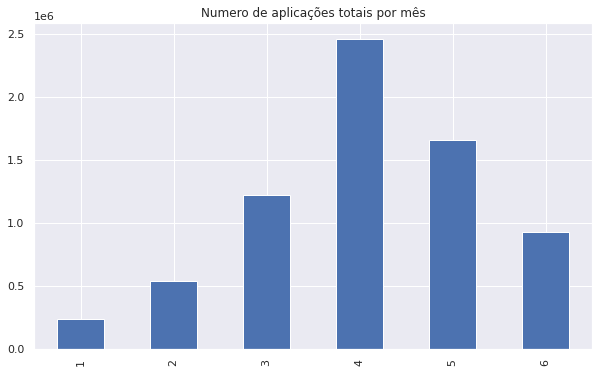

In [41]:
concat = pd.concat([prim_dose,seg_dose])
plt.figure(figsize=(10,6))
concat['mes_da_vacinacao'].value_counts(sort=False).plot(kind='bar')
plt.title('Numero de aplicações totais por mês');

O fato de haver um baixo número de aplicações no mês 6 é porquê esses dados são do meio do mês de Junho.
Não estou surpreso com o grande número de aplicações de segunda dose no mês 4, pois isso é consequência das aplicações de primeira dose no mês 3, onde a grande maioria das vacinas aplicadas eram CoronaVac, que necessita de apênas um mês de intervalo entre as doses